In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteL0IXJ5/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteL0IXJ5/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [6]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [7]:
ds.as_numpy_iterator().next()['label']

2

In [8]:
import numpy as np

In [9]:
data_it = ds.as_numpy_iterator()

In [10]:
data_it.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

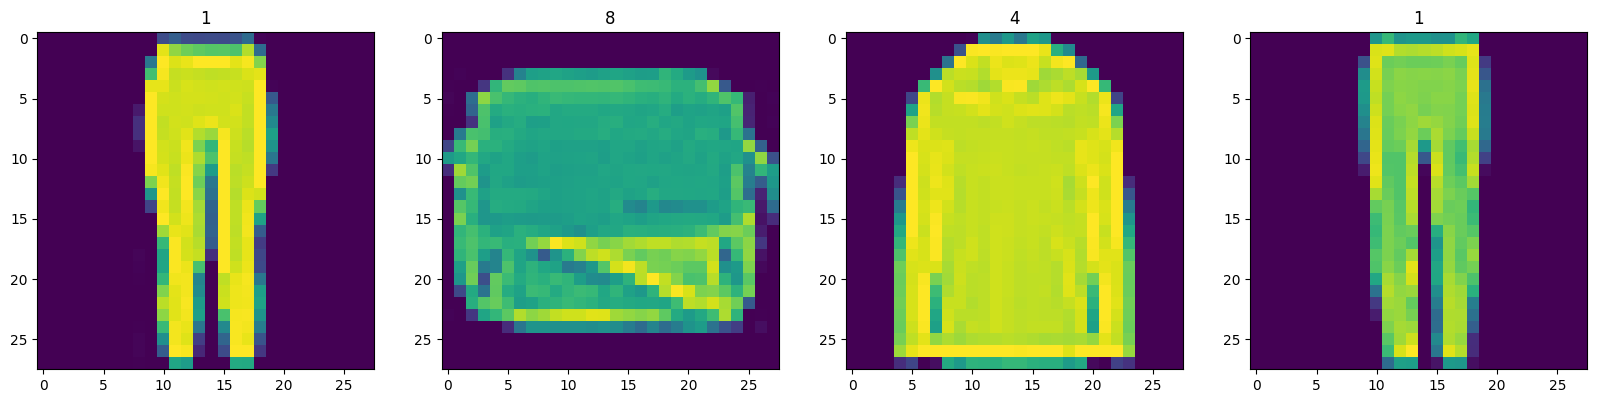

In [11]:
fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx in range(4):
  sample = data_it.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])

In [12]:
def scale_image(data):
  image = data['image']
  return image/255

map
cache
shuffle
batch
prefetch

In [13]:
ds = tfds.load('fashion_mnist',split ='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(6000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [14]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [17]:
def Build_Genrator():
  model = Sequential()

  model.add(Dense(7*7*128, input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding='same',activation = 'sigmoid'))
  return model

In [18]:
genrator = Build_Genrator()

In [19]:
genrator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [20]:
img = genrator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 1s 542ms/step


array([[[[0.5009708 ],
         [0.49391466],
         [0.48358113],
         ...,
         [0.48929176],
         [0.4929128 ],
         [0.49276614]],

        [[0.49879515],
         [0.4997835 ],
         [0.4957806 ],
         ...,
         [0.48724627],
         [0.49326244],
         [0.49088722]],

        [[0.5032477 ],
         [0.506622  ],
         [0.505884  ],
         ...,
         [0.48504552],
         [0.49163976],
         [0.49233988]],

        ...,

        [[0.50410706],
         [0.50654024],
         [0.5038125 ],
         ...,
         [0.49276313],
         [0.4996437 ],
         [0.49838072]],

        [[0.5027064 ],
         [0.50424737],
         [0.5043446 ],
         ...,
         [0.5004956 ],
         [0.5014018 ],
         [0.496703  ]],

        [[0.4948452 ],
         [0.4960541 ],
         [0.4962654 ],
         ...,
         [0.4961304 ],
         [0.4963522 ],
         [0.49857464]]],


       [[[0.49242324],
         [0.49605268],
         [0.49

In [21]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 236ms/step


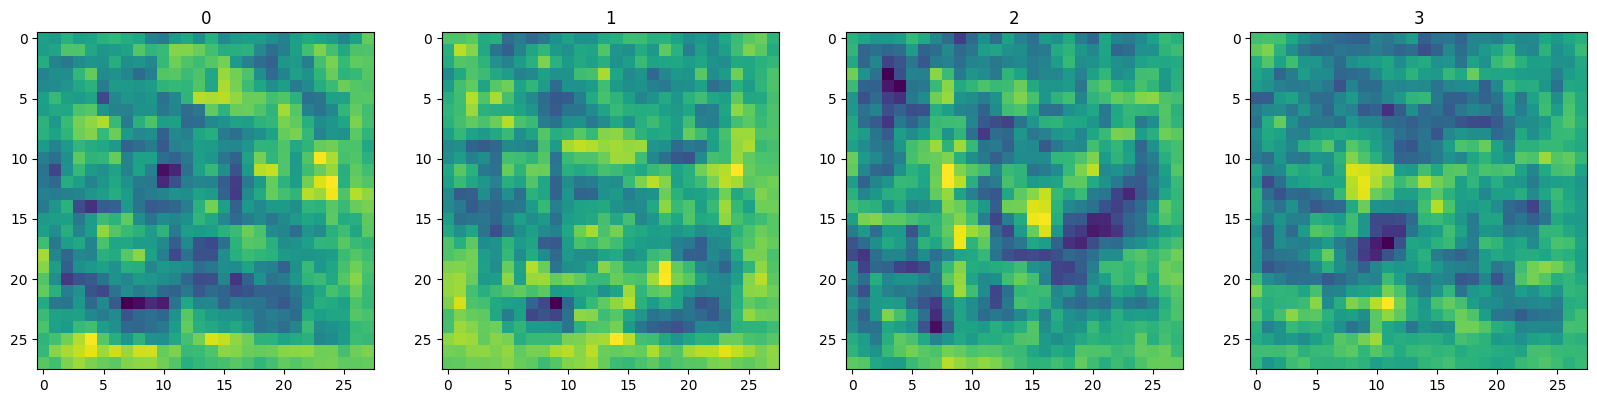

In [22]:
img = genrator.predict(np.random.randn(4,128,1))
fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate (img):
  # sample = data_it.next()
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

In [23]:
def Build_Discriminator():
  model = Sequential()

  model.add(Conv2D(32,5,input_shape= (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation = 'sigmoid'))

  return model

In [24]:
discriminator = Build_Discriminator()

In [25]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [26]:
img.shape

(28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 168ms/step


array([[0.49368936],
       [0.49403542],
       [0.4935288 ],
       [0.4934471 ]], dtype=float32)

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [28]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [29]:
from tensorflow.keras.models import Model

In [30]:
class FashionGAN(Model):
  def __init__(self,genrator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)
    self.genrator = genrator
    self.discriminator = discriminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self,batch):
    real_images = batch
    fake_images = self.genrator(tf.random.normal((128,128,1)),training = False)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images,training = True)
      yhat_fake = self.discriminator(fake_images,training = True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis = 0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis = 0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis = 0)

      total_d_loss = self.d_loss(y_realfake,yhat_realfake)

    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      gen_images = self.genrator(tf.random.normal((128,128,1)),training = True)
      predicted_labels = self.discriminator(gen_images,training=False)
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    ggrad = g_tape.gradient(total_g_loss,self.genrator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.genrator.trainable_variables))

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}

In [31]:
fashgan = FashionGAN(genrator,discriminator)

In [32]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [35]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [36]:
class ModelMonitor(Callback):
  def __init__(self,num_img = 3,latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
    genrated_images = self.model.genrator(random_latent_vectors)
    genrated_images *= 255
    genrated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(genrated_images[i])
      img.save(os.path.join('/content/images2.0',f'genrated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashgan.fit(ds,epochs=4000,callbacks=[ModelMonitor()])

Epoch 1/4000
  1/469 [..............................] - ETA: 4:27:52 - d_loss: 0.6968 - g_loss: 0.6770

In [ ]:
plt.plot(hist.history['d_loss'])
plt.plot(hist.history['g_loss'])

In [ ]:
imgs = genrator.predict(tf.random.normal((16,128,1)))

In [ ]:
fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
genrator.save('genrator.h5')
discriminator.save('discriminator.h5')